# Consider only the below columns and prepare a prediction model for predicting Price.

* Corolla ("Price", "Age_08_04", "KM", "HP", "CC", "Doors", "Gears", "Quarterly_Tax", "Weight")]

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
car_ty = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
cars_data = car_ty[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]

In [3]:
cars_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [4]:
cars_data.shape

(1436, 9)

In [5]:
cars_data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

## EDA

In [6]:
cars_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1, inplace=True)

In [7]:
cars_data.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [8]:
cars_data[cars_data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
cars_data = cars_data.drop_duplicates().reset_index(drop=True)
cars_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


## Model Building 

In [10]:
model = smf.ols(formula='Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=cars_data).fit()

In [11]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:41:31   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.rsquared.round(3), model.rsquared_adj.round(3)

(0.863, 0.862)

#### Above Model accuracy is 86%. Also the p-values for CC & Doors are insignificant, Let's check the model validity & transform it to improve performance. 

## Model Testing 
* Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
* Also find their tvalues and pvalues

In [14]:
slr1 = smf.ols(formula='Price ~ CC', data=cars_data).fit()

In [15]:
slr1.params

Intercept    9053.536789
CC              1.057605
dtype: float64

In [16]:
slr1.pvalues.round(5), slr1.tvalues.round(5)  # CC has significant p-value

(Intercept    0.0
 CC           0.0
 dtype: float64,
 Intercept    24.87959
 CC            4.74504
 dtype: float64)

In [17]:
slr2 = smf.ols(formula='Price ~ Doors', data=cars_data).fit()

In [18]:
slr2.params

Intercept    7916.145233
Doors         695.497769
dtype: float64

In [19]:
slr2.pvalues.round(5), slr2.tvalues.round(5)  # Doors has significant p-value

(Intercept    0.0
 Doors        0.0
 dtype: float64,
 Intercept    19.42155
 Doors         7.07052
 dtype: float64)

In [20]:
mlr = smf.ols(formula='Price ~ CC+Doors', data=cars_data).fit()

In [21]:
mlr.params

Intercept    6568.339539
CC              0.939773
Doors         662.318691
dtype: float64

In [22]:
mlr.pvalues.round(5), mlr.tvalues.round(5)  # CC & Doors have significant pvalue

(Intercept    0.00000
 CC           0.00002
 Doors        0.00000
 dtype: float64,
 Intercept    12.78634
 CC            4.26801
 Doors         6.75224
 dtype: float64)

## Model Validation Techniques 

### 1. Multicoliinearity check
* Correlation & Heat Map Analysis
* Using VIF

### Correlation Analysis

In [23]:
heatmp = cars_data.corr()
heatmp.round(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.00,-0.88,-0.57,0.31,0.12,0.18,0.06,0.21,0.58
Age,-0.88,1.00,0.50,-0.16,-0.10,-0.15,-0.01,-0.19,-0.47
KM,-0.57,0.50,1.00,-0.33,0.10,-0.04,0.01,0.28,-0.02
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
CC,0.12,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.18,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.01,0.21,0.01,-0.16,1.00,-0.01,0.02
QT,0.21,-0.19,0.28,-0.30,0.31,0.11,-0.01,1.00,0.62
Weight,0.58,-0.47,-0.02,0.09,0.34,0.30,0.02,0.62,1.00


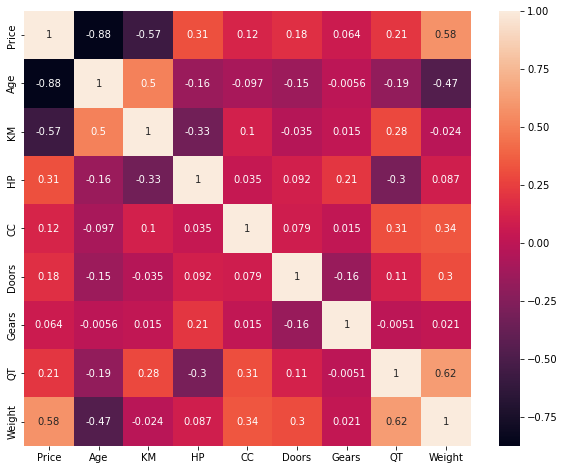

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmp, annot=True)
plt.show()

### VIF
* Calculate VIF = 1/(1-Rsquare) for all independent variables

In [25]:
rsq_Age = smf.ols(formula='Age ~ KM+HP+CC+Doors+Gears+QT+Weight', data=cars_data).fit()
vif_Age = 1/(1-rsq_Age.rsquared.round(2))

rsq_KM = smf.ols(formula='KM ~ Age+HP+CC+Doors+Gears+QT+Weight', data=cars_data).fit()
vif_KM = 1/(1-rsq_KM.rsquared.round(2))

rsq_HP = smf.ols(formula='HP ~ KM+Age+CC+Doors+Gears+QT+Weight', data=cars_data).fit()
vif_HP = 1/(1-rsq_HP.rsquared.round(2))

rsq_CC = smf.ols(formula='CC ~ KM+HP+Age+Doors+Gears+QT+Weight', data=cars_data).fit()
vif_CC = 1/(1-rsq_CC.rsquared.round(2))

rsq_Doors = smf.ols(formula='Doors ~ KM+HP+CC+Age+Gears+QT+Weight', data=cars_data).fit()
vif_Doors = 1/(1-rsq_Doors.rsquared.round(2))

rsq_Gears = smf.ols(formula='Gears ~ KM+HP+CC+Doors+Age+QT+Weight', data=cars_data).fit()
vif_Gears = 1/(1-rsq_Gears.rsquared.round(2))

rsq_QT = smf.ols(formula='QT ~ KM+HP+CC+Doors+Gears+Age+Weight', data=cars_data).fit()
vif_QT = 1/(1-rsq_QT.rsquared.round(2))

rsq_Weight = smf.ols(formula='Weight ~ KM+HP+CC+Doors+Gears+QT+Age', data=cars_data).fit()
vif_Weight = 1/(1-rsq_Weight.rsquared.round(2))

# Putting the values in Dataframe format
d1 = {'Variables' : ['Age', 'KM', 'HP', 'CC', 'Doors','Gears','QT','Weight'],
       'VIF'      : [vif_Age, vif_KM, vif_HP, vif_CC, vif_Doors, vif_Gears, vif_QT, vif_Weight]}
vif = pd.DataFrame(d1)
vif

,Variables,VIF
0,Age,1.886792
1,KM,1.754386
2,HP,1.428571
3,CC,1.162791
4,Doors,1.149425
5,Gears,1.098901
6,QT,2.272727
7,Weight,2.500000


#### None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

### 2. Residual Analysis test
* Test for Normality of Residuals (Q-Q Plot)

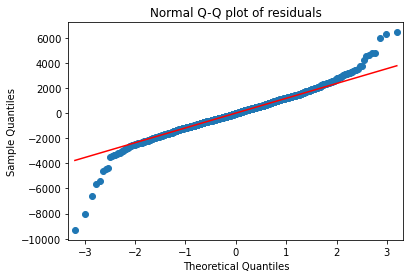

In [26]:
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>6000))  # outlier detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [28]:
list(np.where(model.resid<-6000))  # outlier detection from above QQ plot of residuals

[array([220, 600, 959], dtype=int64)]

## 3. Homoscedasticity check
* Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
* Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
* Using Residual Regression Plots

In [29]:
def standardised_values(val):
    return (val - val.mean())/val.std()            # User defined z = (x - mu)/sigma

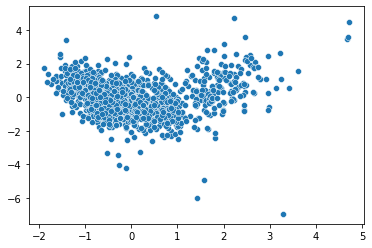

In [30]:
sns.scatterplot(x=standardised_values(model.fittedvalues), y=standardised_values(model.resid))
plt.show()

eval_env: 1


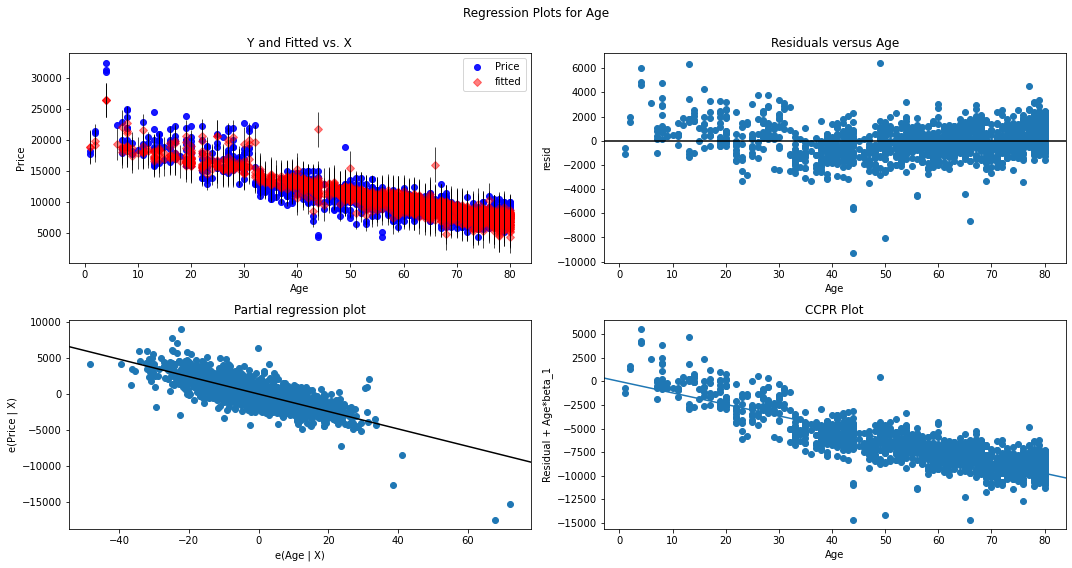

In [31]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Age', fig = fig)
plt.show()

eval_env: 1


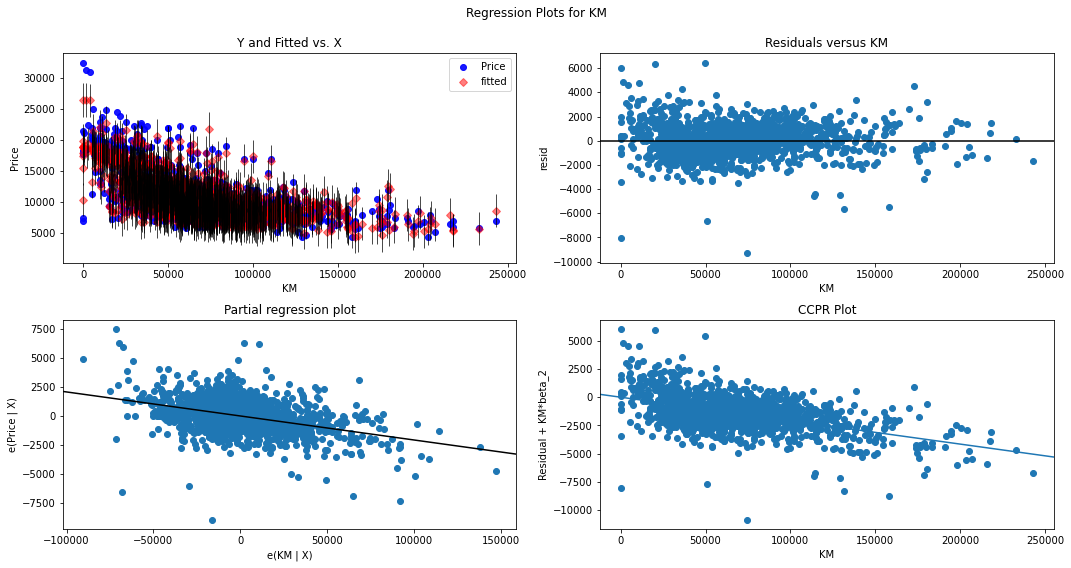

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

eval_env: 1


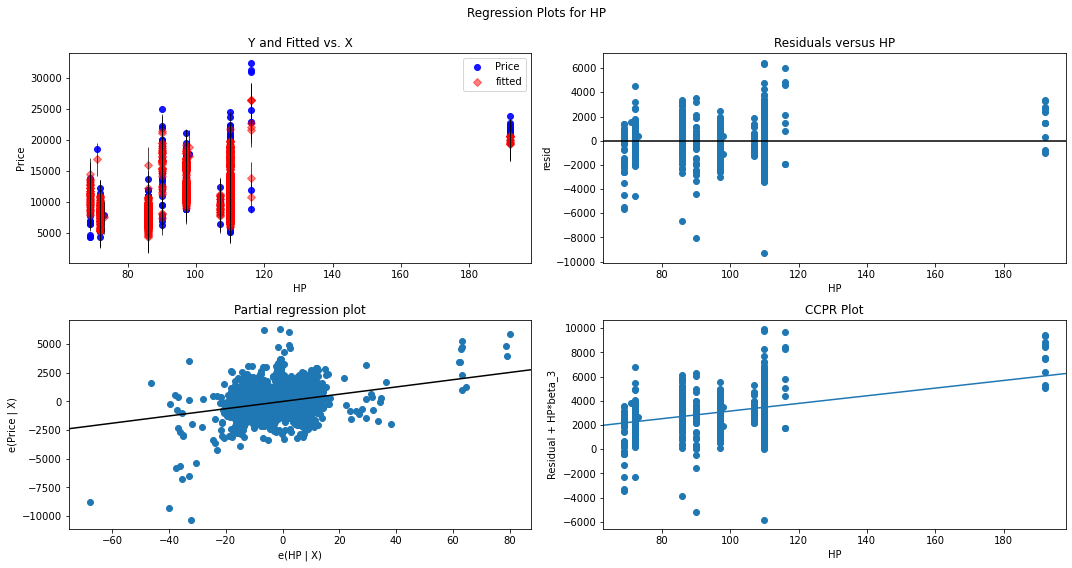

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

eval_env: 1


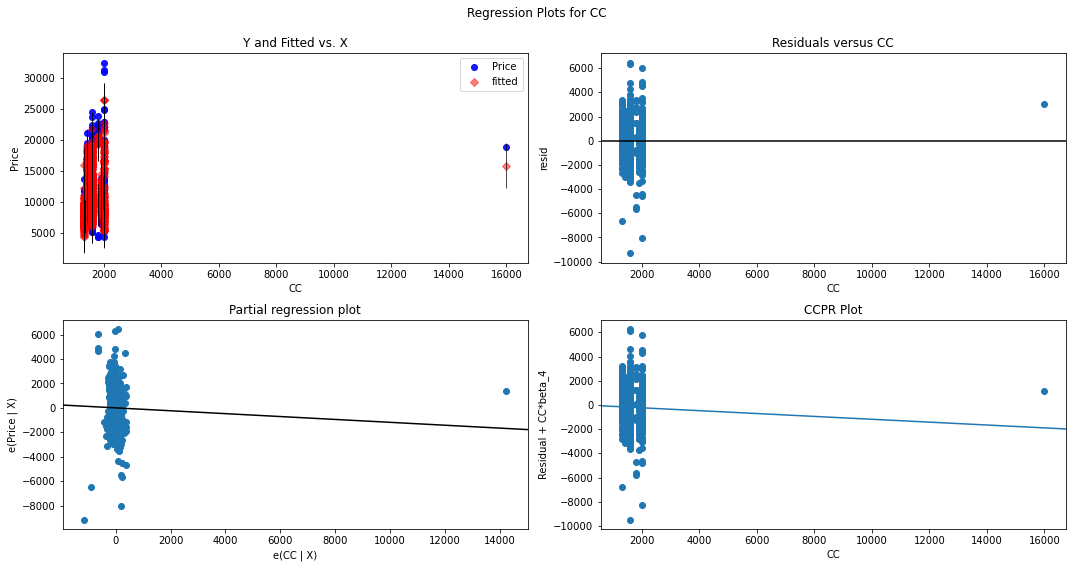

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'CC', fig = fig)
plt.show()

eval_env: 1


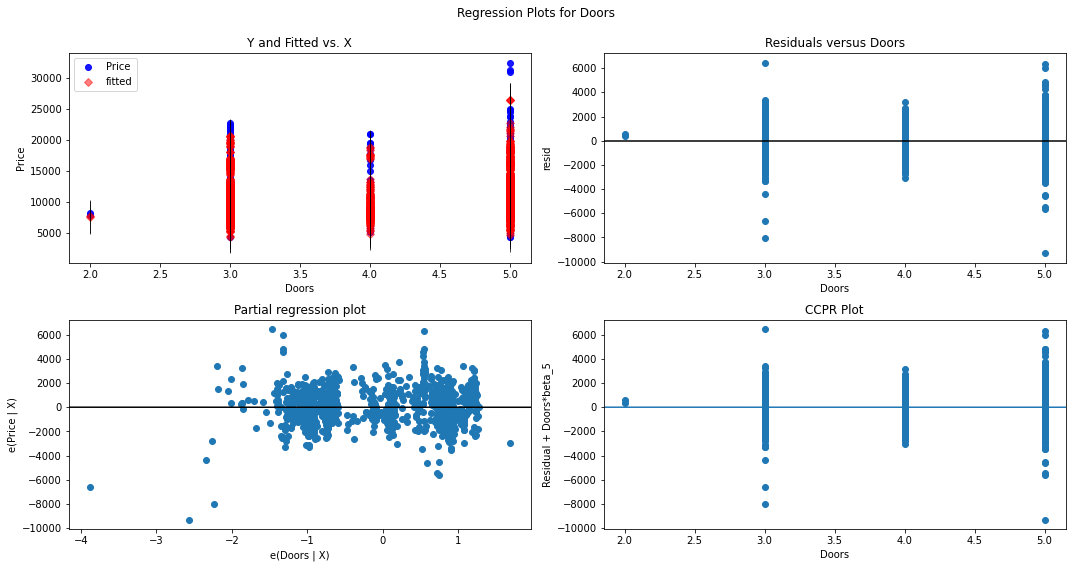

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

eval_env: 1


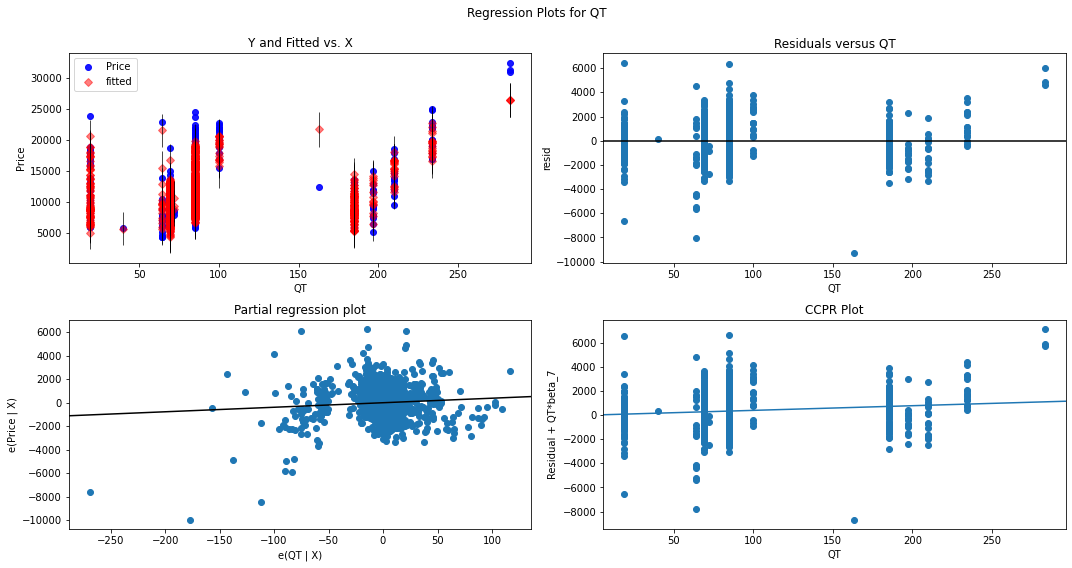

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'QT', fig = fig)
plt.show()

eval_env: 1


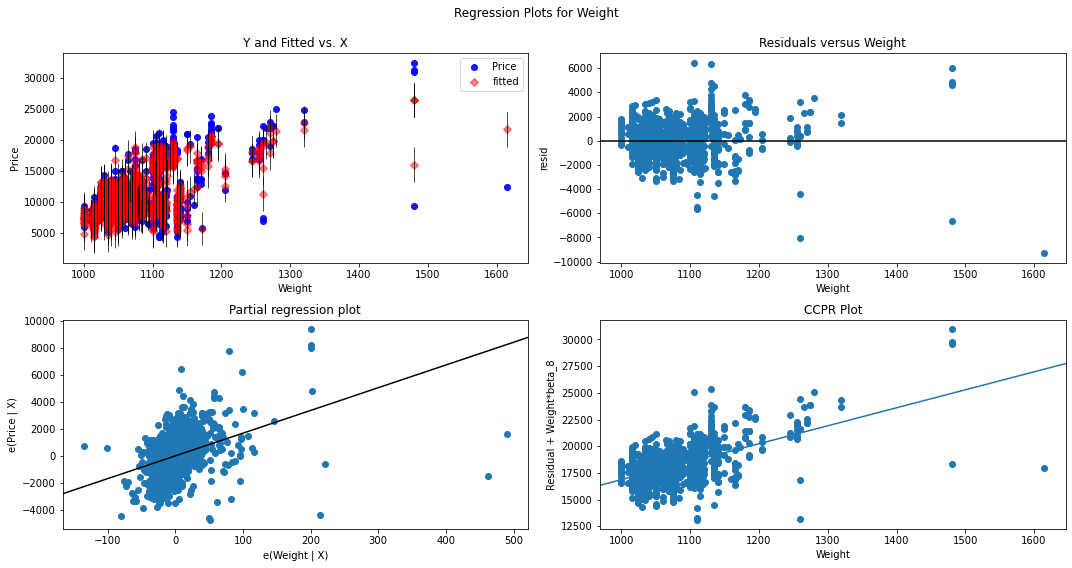

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)
plt.show()

eval_env: 1


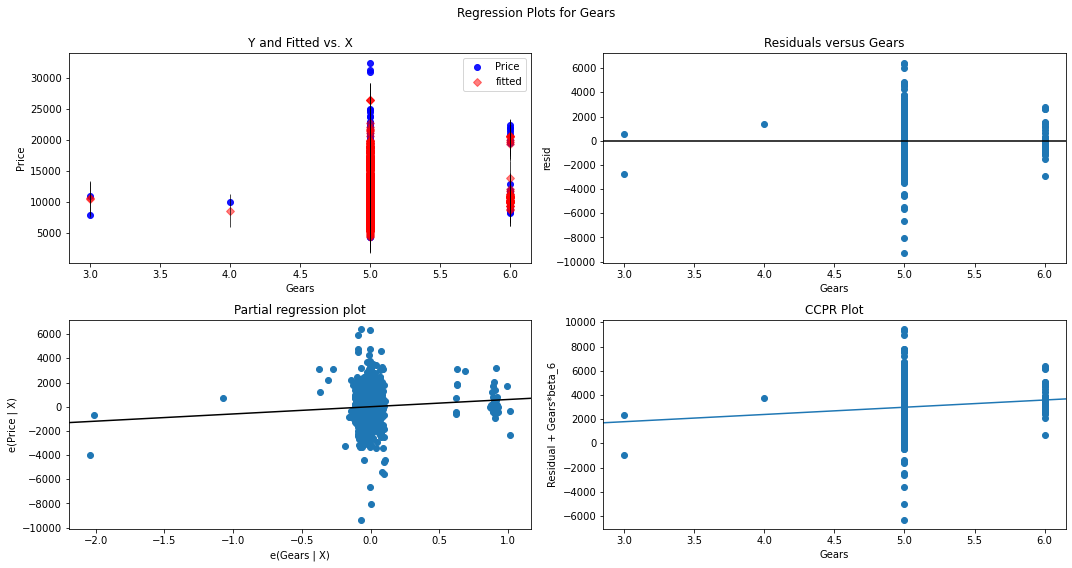

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
* 1. Cook's Distance 
* 2. Leverage value

In [39]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

In [40]:
(c,_) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

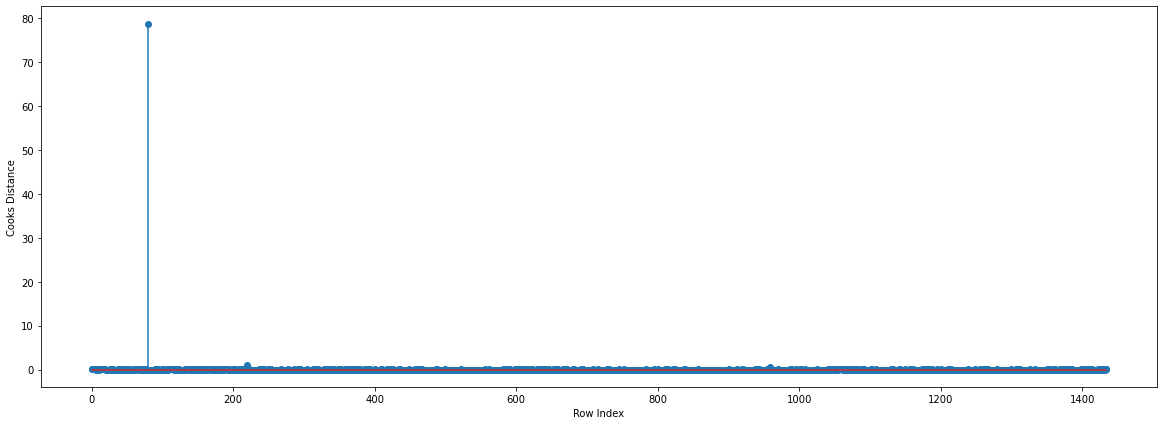

In [41]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
# Index no. and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582248232)

In [43]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=cars_data.shape[1]
n=cars_data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

## Improving the Model

In [44]:
# Creating a copy of data so that original dataset is not affected
cars_new = cars_data.copy()
cars_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [45]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

cars_new = cars_new.drop(index=(80), axis=0).reset_index(drop=True)
cars_new.shape

(1434, 9)

## Model Deletion Diagnostics and Final Model

In [46]:
model2 = smf.ols(formula='Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=cars_new).fit()

In [47]:
while model2.rsquared < 0.90:
    for c in [np.max(c) > 0.5]:
        model2 = smf.ols(formula='Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=cars_new).fit()
        (c,_) = model2.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        cars_new = cars_new.drop(index=(np.argmax(c)), axis=0).reset_index(drop=True)
        cars_new
    else:
        final_model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight',data=cars_new).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared.round(4), "  ", '&', "  ", 'AIC Value', final_model.aic.round(2))

Thus model accuracy is improved to 0.8766    &    AIC Value 24557.75
Thus model accuracy is improved to 0.884    &    AIC Value 24453.24
Thus model accuracy is improved to 0.8882    &    AIC Value 24382.71
Thus model accuracy is improved to 0.8903    &    AIC Value 24339.54
Thus model accuracy is improved to 0.891    &    AIC Value 24313.38
Thus model accuracy is improved to 0.8923    &    AIC Value 24277.5
Thus model accuracy is improved to 0.8934    &    AIC Value 24246.83
Thus model accuracy is improved to 0.8947    &    AIC Value 24209.9
Thus model accuracy is improved to 0.8955    &    AIC Value 24180.54
Thus model accuracy is improved to 0.893    &    AIC Value 24161.25
Thus model accuracy is improved to 0.894    &    AIC Value 24129.71
Thus model accuracy is improved to 0.8954    &    AIC Value 24088.72
Thus model accuracy is improved to 0.896    &    AIC Value 24063.82
Thus model accuracy is improved to 0.8968    &    AIC Value 24035.49
Thus model accuracy is improved to 0.8964

In [48]:
final_model.rsquared.round(4)   

0.9004

In [49]:
d2 = {'Models' : ['model', 'final_model'],
      'Accuracy_rsquare' : [model.rsquared.round(4) , final_model.rsquared.round(4)],
      'AIC Value' : [model.aic.round(2), final_model.aic.round(2)]}
Model_Summary = pd.DataFrame(d2)
Model_Summary

,Models,Accuracy_rsquare,AIC Value
0,model,0.8625,24750.41
1,final_model,0.9004,22093.16


#### Model Accuracy is increased to 90.02%

#### Hence, we can finalise our final_model for this dataset.

## ================================================= 